# Import Libraries

In [1]:
import os
import yaml
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from ultralytics import YOLO

# Data Loading

In [ ]:
drive.mount('/content/drive')

In [ ]:
dataset_path = '/content/real_dataset'

image_dir = os.path.join(dataset_path, 'images')
label_dir = os.path.join(dataset_path, 'labels')

def count_files_in_subfolders(directory):
    total = 0
    for subfolder in ['train', 'val', 'test']:
        sub_dir = os.path.join(directory, subfolder)
        if os.path.exists(sub_dir):
            total += len(os.listdir(sub_dir))
    return total

print("Jumlah file gambar:", count_files_in_subfolders(image_dir))
print("Jumlah file label :", count_files_in_subfolders(label_dir))

Jumlah file gambar: 868
Jumlah file label : 868


In [ ]:
yaml_content = """
train: /content/real_dataset/images/train
val: /content/real_dataset/images/val
test: /content/real_dataset/images/test

nc: 2
names: ['barcode', 'qr']
"""

with open('/content/real_dataset.yaml', 'w') as f:
    f.write(yaml_content)

print("data.yaml selesai dibuat")

data.yaml selesai dibuat


- File real_dataset.yaml berfungsi sebagai panduan utama bagi YOLOv8 untuk mengenali struktur dataset yang akan digunakan saat training, validasi, dan test. Di dalamnya terdapat informasi penting seperti lokasi gambar, jumlah kelas, dan nama nama label (misalnya barcode dan qr). Tanpa file ini, model tidak tau harus membaca data dari mana dan tidak bisa memahami jenis objek yang ingin dideteksi.

# Augmentation

In [ ]:
hyp_content = """
# Barcode + QR Detection Augmentation Config

lr0: 0.01
lrf: 0.01
momentum: 0.937
weight_decay: 0.0005
warmup_epochs: 3.0
warmup_momentum: 0.8
warmup_bias_lr: 0.1

box: 0.05
cls: 0.5
iou: 0.2

hsv_h: 0.015
hsv_s: 0.5
hsv_v: 0.4

degrees: 5.0
translate: 0.1
scale: 0.5
shear: 0.0
perspective: 0.0
flipud: 0.0
fliplr: 0.5

mosaic: 1.0
mixup: 0.1
copy_paste: 0.0
"""

with open("barcode_hyp.yaml", "w") as f:
    f.write(hyp_content.strip())

print("File barcode_hyp.yaml berhasil dibuat")

File barcode_hyp.yaml berhasil dibuat


- Pada konfigurasi barcode_hyp.yaml, saya mengatur beberapa hal penting untuk melatih model dengan baik. lr0 dan lrf (learning rate awal dan akhir) diatur ke 0.01 untuk mengontrol kecepatan belajar. Parameter seperti momentum, weight_decay, dan warmup_epochs membantu agar pelatihan lebih stabil di awal. Nilai box, cls, dan iou dipakai untuk mengatur bobot kesalahan saat prediksi kotak, label, dan tumpang tindih objek. Untuk variasi warna, digunakan hsv_h, hsv_s, dan hsv_v (untuk ubah hue, saturasi, dan kecerahan). Sementara degrees, translate, scale, shear, dan perspective memberi variasi bentuk dan posisi. Gambar juga dibalik pakai flipud dan fliplr. Teknik seperti mosaic, mixup, dan copy_paste ditambahkan agar model bisa belajar dari gambar yang lebih beragam.

# Model Training

In [ ]:
# Load model YOLOv8n
model = YOLO("yolov8n.pt")

# Load hyperparameter config
with open("barcode_hyp.yaml", "r") as f:
    hyp = yaml.safe_load(f)

# Train model
model.train(
    data="/content/real_dataset.yaml",
    epochs=50,
    imgsz=640,
    batch=32,
    name="finpro_yolov8_barcode_augmented",
    project="runs/train",
    patience=10,
    save=True,
    **hyp
)

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=0.05, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/real_dataset.yaml, degrees=5.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.5, hsv_v=0.4, imgsz=640, int8=False, iou=0.2, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=finpro_yolov8_barcode_augmented, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ea1de596330>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

- Model YOLOv8n ditrain dengan gambar berukuran 640x640 karena ukuran ini cukup besar untuk menangkap detail barcode dan QR, namun tetap ringan dan cepat saat diproses. Batch size 32 dipilih agar training tetap stabil. Training awalnya dirancang untuk 50 epoch, namun otomatis berhenti di epoch ke 34 karena selama 10 epoch berturut turut tidak ada peningkatan performa validasi, hal ini dikarenakan fitur early stopping dengan patience = 10. Artinya, model dianggap sudah mencapai hasil terbaik sebelum 50 epoch selesai. Hasil akhirnya baik dengan precision 97.2%, recall 96.6%, mAP@0.5 sebesar 96.5%, dan mAP@0.5:0.95 sebesar 78.1%.

# Model Evaluation

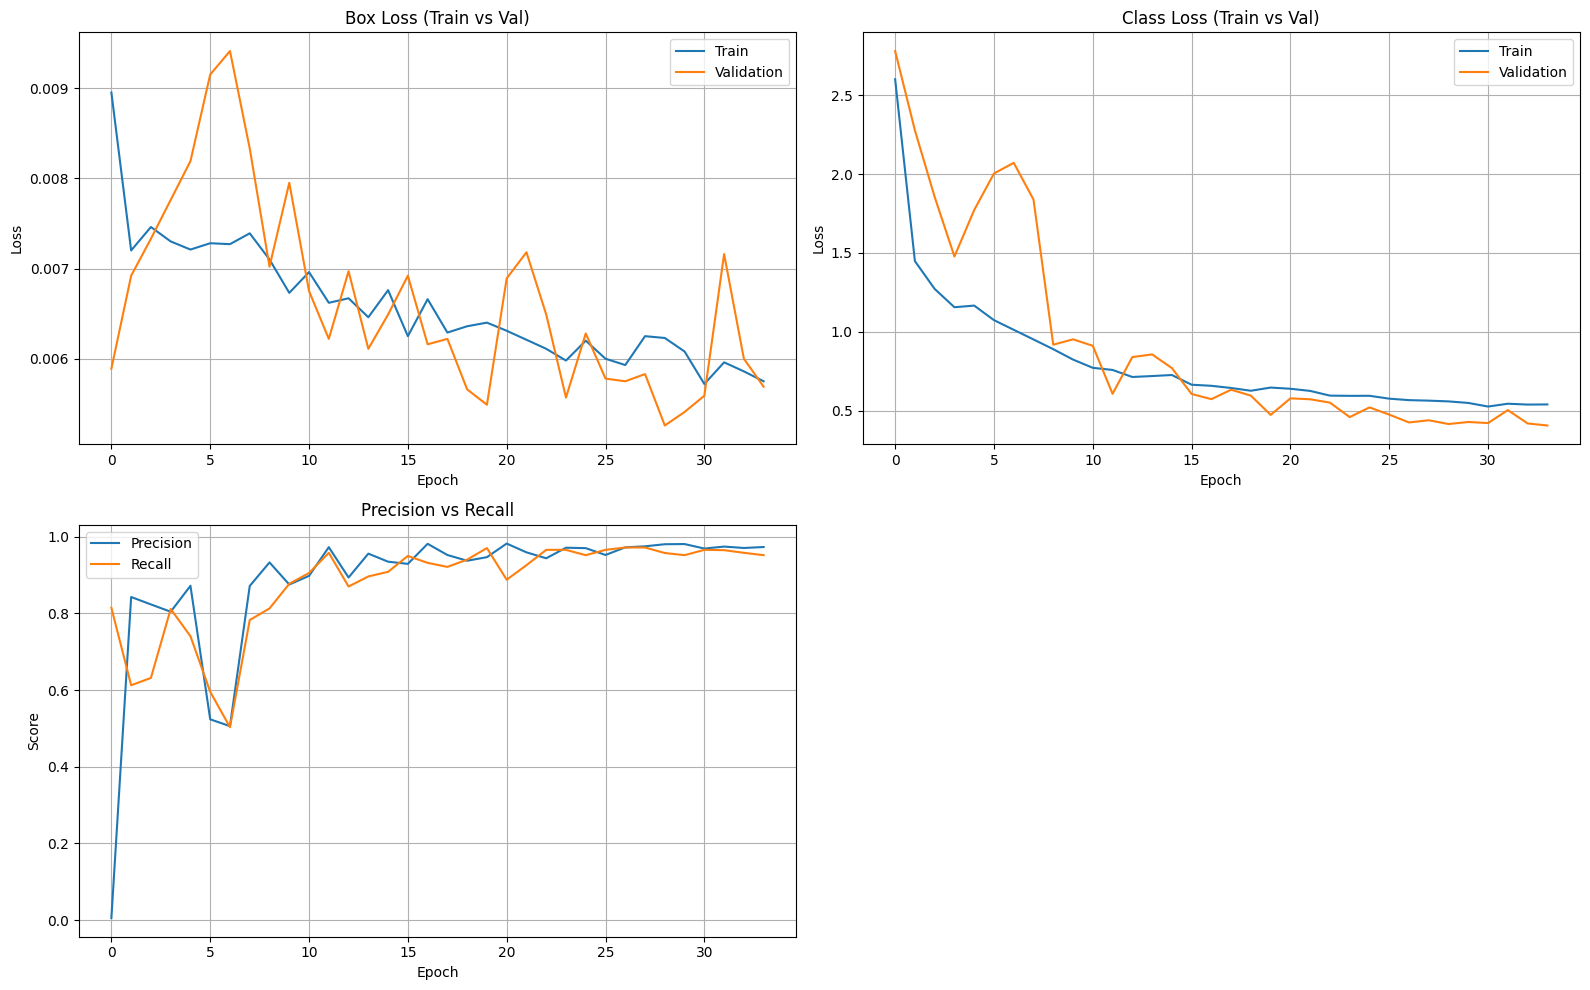

In [ ]:
# Load csv
df = pd.read_csv("/content/runs/train/finpro_yolov8_barcode_augmented/results.csv")

plt.figure(figsize=(16, 10))

# Box Loss (Train vs Val)
plt.subplot(2, 2, 1)
plt.plot(df['train/box_loss'], label='Train')
plt.plot(df['val/box_loss'], label='Validation')
plt.title('Box Loss (Train vs Val)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Class Loss (Train vs Val)
plt.subplot(2, 2, 2)
plt.plot(df['train/cls_loss'], label='Train')
plt.plot(df['val/cls_loss'], label='Validation')
plt.title('Class Loss (Train vs Val)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Precision vs Recall
plt.subplot(2, 2, 3)
plt.plot(df['metrics/precision(B)'], label='Precision')
plt.plot(df['metrics/recall(B)'], label='Recall')
plt.title('Precision vs Recall')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# Tampilan semua plot
plt.tight_layout()
plt.show()

**Grafik Box Loss**

- Grafik ini menunjukkan seberapa baik model mempelajari posisi barcode dalam gambar. Garis biru dan oranye sama sama turun dan stabil di angka yang kecil, artinya model makin akurat dan tidak mengalami overfitting.

**Grafik Class Loss**

- Grafik ini menunjukkan kemampuan model dalam membedakan barcode dan QR code. Terlihat nilai loss terus menurun untuk kedua data, menandakan model belajar dengan baik dan konsisten dalam mengklasifikasi jenis barcode.

**Grafik Precision vs Recall**

- Garis precision dan recall sama sama meningkat tajam di awal dan kemudian stabil di atas 90%. Artinya, model bisa menemukan hampir semua barcode (recall tinggi) dan jarang salah dalam prediksi (precision tinggi), jadi performanya sudah sangat bagus dan bisa diandalkan.

In [ ]:
# Load model hasil training (best.pt)
model = YOLO("/content/runs/train/finpro_yolov8_barcode_augmented/weights/best.pt")

# Evaluasi model di test set
results = model.val(
    data="/content/real_dataset.yaml",
    split="test",
)

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 55.7±36.5 MB/s, size: 142.4 KB)
val: Scanning /content/drive/MyDrive/finpro_dataset/jo_dataset/real_dataset/labels/test.cache... 87 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 87/87 118.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 1.5it/s 4.0s
                   all         87        120      0.992      0.969      0.993      0.806
               barcode         40         41      0.998      0.951      0.993      0.836
                    qr         54         79      0.987      0.987      0.994      0.775
Speed: 8.3ms preprocess, 8.9ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to /content/runs/detect/val


- Model berhasil mendeteksi barcode dan QR code dengan hasil yang sangat baik, dengan precision 99.2% dan recall 96.9%, artinya hampir semua barcode/QR terdeteksi dan prediksinya jarang meleset. Nilai mAP50 sebesar 99.3% dan mAP50-95 sebesar 80.6% juga menunjukkan bahwa model cukup akurat dalam mengenali posisi dan jenis barcode pada gambar.